<a href="https://colab.research.google.com/github/cassio-carvalho/CovidPredictionModel-MachineLearning/blob/main/CovidPredictionModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image

# DOWNLOAD DATASET
!pip install wget
!wget https://raw.githubusercontent.com/cassio-carvalho/CovidPredictionModel-MachineLearning/main/dataset_einstein.csv


# IMPORT DATASET TO DATAFRAME
df = pd.read_csv('dataset_einstein.csv', delimiter=';')

# SHOWING THE FIRST FIVE ROWS
print(df.head(5))

count_row = df.shape[0]  # GETTING REGISTRATION NUMBERS
count_col = df.shape[1]  # GETTING COLUMN NUMBERS

print(count_row)
print(count_col)

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=a4970fe73dd37a1d37f0d5d011f8a26b3b7c0da2e6d380d7229a29a48bad6627
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
--2023-08-28 21:04:31--  https://raw.githubusercontent.com/cassio-carvalho/CovidPredictionModel-MachineLearning/main/dataset_einstein.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248866 (243K) [text/plain]
Saving to: ‘dataset_einstein.csv’

dataset_einstein.cs 100%[===================>] 243.03K  --.-KB/s    in 0.02s   

2023-08-28 21:04:31 (13.1 MB/s) - ‘dataset_einstein.csv’ saved [248866/248866]

        Patient ID  Patient age quantile SAR

In [2]:
# REMOVING RECORDS IN WHICH AT LEAST ONE FIELD IS BLANK (NAN)
df = df.dropna()

print(df.head(5))

print('Number of fields (columns): ', df.shape[1])
print('Total records:', df.shape[0])

# VERIFYING IF THE DATABASE IS BALANCED OR UNBALANCED
print ('Total negative records: ', df[df['SARS-Cov-2 exam result'] =='negative'].shape[0])
print ('Total positive records: ', df[df['SARS-Cov-2 exam result'] =='positive'].shape[0])


         Patient ID  Patient age quantile SARS-Cov-2 exam result  \
1   126e9dd13932f68                    17               negative   
8   8bb9d64f0215244                     1               negative   
28  fc41531ca4faf1e                    13               negative   
29  891d0f6449ff3d7                    14               negative   
30  ebdd7c67fcb21b4                     9               negative   

    Patient addmited to regular ward (1=yes. 0=no)  \
1                                                0   
8                                                0   
28                                               0   
29                                               0   
30                                               1   

    Patient addmited to semi-intensive unit (1=yes. 0=no)  \
1                                                   0       
8                                                   1       
28                                                  0       
29                    

In [3]:
# LABELS FOR Y
Y = df['SARS-Cov-2 exam result'].values
print(Y)

# X WILL BE OUR MATRIX WITH THE FEATURES
# GET TRAINING FIELDS (Hemoglobin, Leukocytes, Basophils, C-Reactive Protein mg/dL)

X = df[['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']].values

# SHOW X
print(X)

['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'negative' 'negat

In [4]:
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [5]:
# CREATE A DECISION TREE TYPE ALGORITHM

decision_tree_algorithm = DecisionTreeClassifier(criterion='entropy', max_depth=5)

# AGORA EM MINHA_ARVORE EU TENHO ASSOCIADA A ELA O ALGORITMO DE TREINAMENTO,
# BASICAMENTE A RECEITA QUE VIMOS NA PARTE TÉORICA.

#DECISION TREE TRAINING
model = decision_tree_algorithm.fit(X_training, Y_training)

[0.13553694 0.56306579 0.18040441 0.12099287]


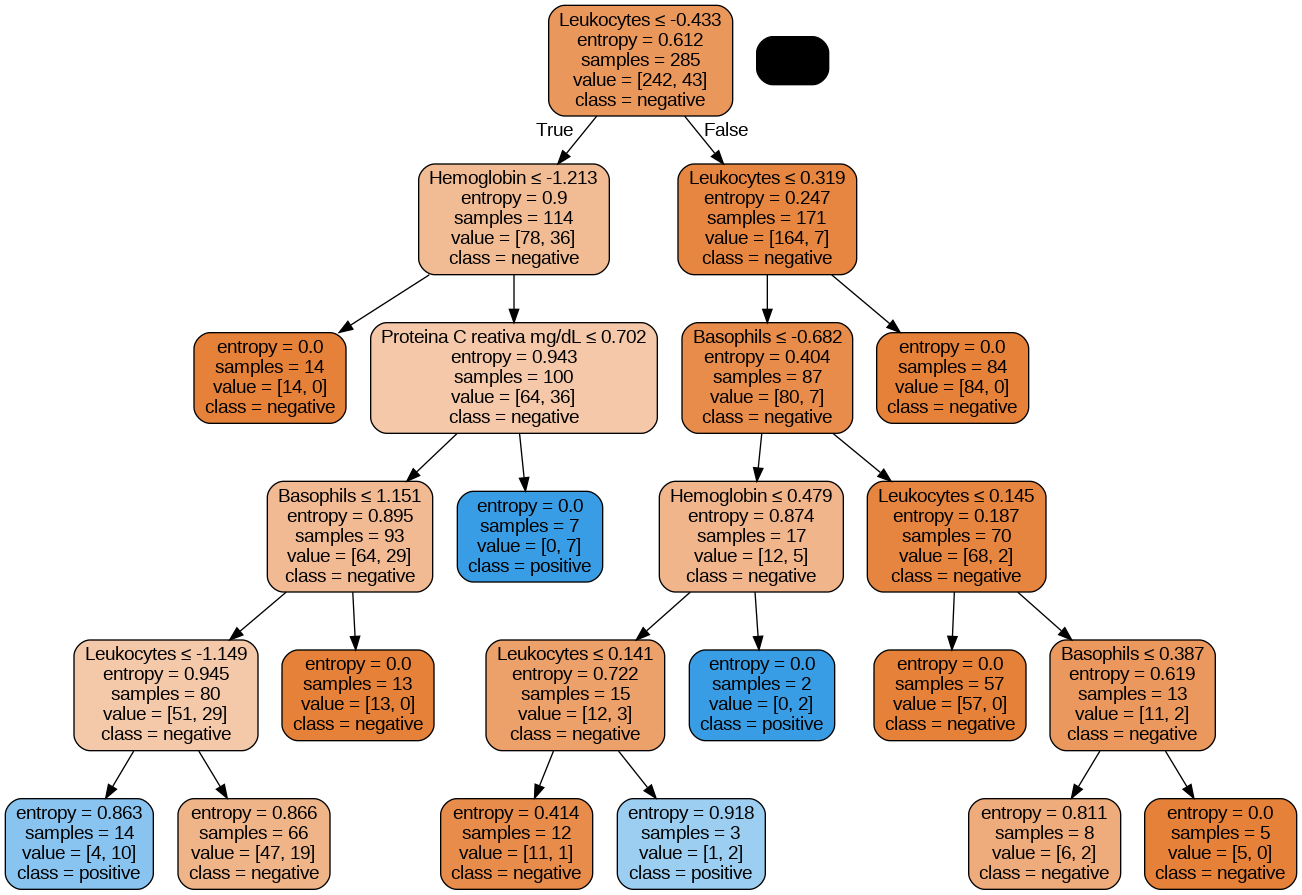

In [6]:
print (model.feature_importances_)


name_features = ['Hemoglobin', 'Leukocytes', 'Basophils','Proteina C reativa mg/dL']
name_classes = model.classes_

# SHOW DECISION TREE
dot_data = StringIO()

export_graphviz(model, out_file=dot_data, filled=True, feature_names=name_features, class_names=name_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("decision_tree.png")
Image('decision_tree.png')

Feature ranking:
1. feature 1 (0.563066)
2. feature 2 (0.180404)
3. feature 0 (0.135537)
4. feature 3 (0.120993)


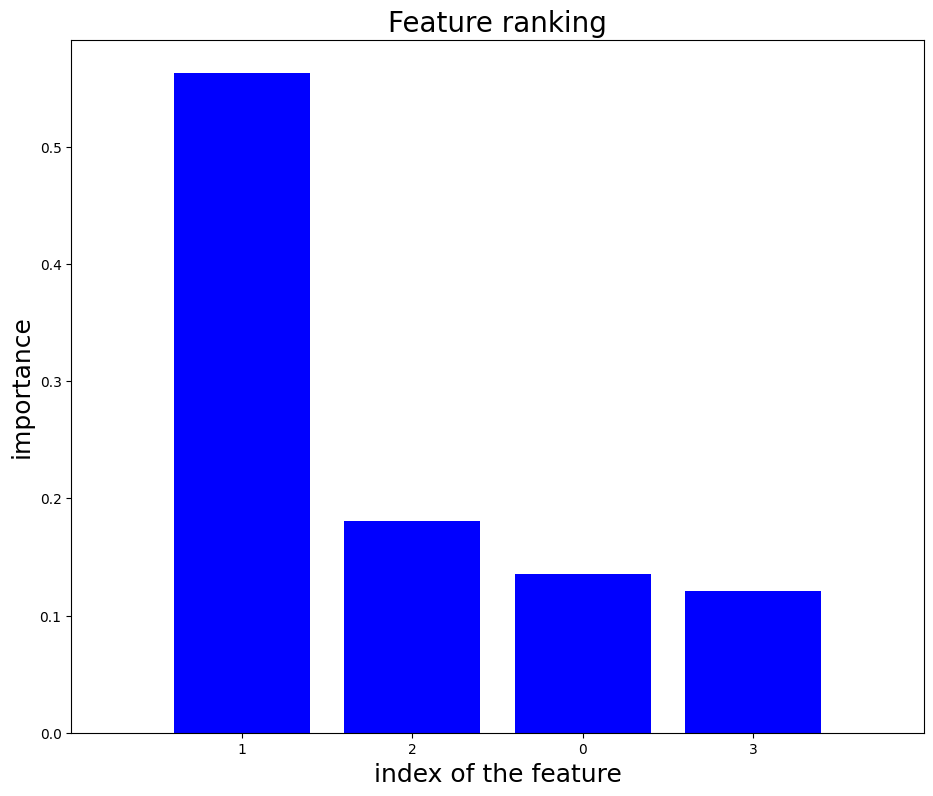

In [7]:
importances = model.feature_importances_
index = np.argsort(importances)[::-1]
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, index[f], importances[index[f]]))
f, ax = plt.subplots(figsize=(11, 9))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(X.shape[1]), importances[index],
    color="b",
    align="center")
plt.xticks(range(X.shape[1]), index)
plt.xlim([-1, X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

#FEATURES INDEX
# 0 - 'Hemoglobin',
# 1 - 'Leukocytes'
# 2 - 'Basophils',
# 3 - 'Proteina C reativa mg/dL']

In [8]:
Y_predictions = model.predict(X_test)

print("DECISION TREE ACCURACY: ", sklearn.metrics.accuracy_score(Y_test, Y_predictions))
print (classification_report(Y_test, Y_predictions))

DECISION TREE ACCURACY:  0.8472222222222222
              precision    recall  f1-score   support

    negative       0.87      0.97      0.91        60
    positive       0.60      0.25      0.35        12

    accuracy                           0.85        72
   macro avg       0.73      0.61      0.63        72
weighted avg       0.82      0.85      0.82        72

